# Support Vector Regression (SVR)

## Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [23]:
dataset = pd.read_excel('iris.xlsx')
# X = dataset.iloc[:, :-1].values
# y = dataset['class'].values
# print(dataset.head())

## 2.2.1 Spliting the dataset

In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0) cant be used since the split should be per class and trainsplit has no such functionality
#the split also must contain the original order of the data
#thus we should do it manually
training_id = []
test_id = []
train_ratio = 0.7
test_ratio = 0.3
classes = dataset['class'].unique()
for cls in classes:
    cls_dataset = dataset[dataset['class'] == cls]

    num_train = int(train_ratio * len(cls_dataset))  #35
    num_test = len(cls_dataset) - num_train #15

    cls_id = cls_dataset['instance_id'].tolist()

    training_id.extend(cls_id[:num_train])
    test_id.extend(cls_id[num_train:])

#     print(f"Class {cls}:")
#     print(f"Training IDs: {cls_id[:num_train]}")
#     print(f"Test IDs: {cls_id[num_train:]}")

#make sure its still maintains the original order of the data
training_id_sorted = sorted(training_id)
test_id_sorted = sorted(test_id)

print("Q2.1.1 Split training set and test set:")
print(f"Training set: {training_id_sorted}")
print(f"Test set: {test_id_sorted}")


Q2.1.1 Split training set and test set:
Training set: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
Test set: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]


## Feature Scaling and Lable Encoder

In [25]:
#In Support Vector Machines (SVM), feature scaling or normalization are not strictly required, but are highly recommended,
#as it can significantly improve model performance and convergence speed.
#SVM tries to find the optimal hyperplane that separates the data points of different classes with the maximum margin.
#google reference
sc = StandardScaler()

X_train = dataset.loc[dataset['instance_id'].isin(training_id_sorted), ['sepal length', 'sepal width', 'petal length', 'petal width']].values
y_train = dataset.loc[dataset['instance_id'].isin(training_id_sorted), 'class'].values

X_test = dataset.loc[dataset['instance_id'].isin(test_id_sorted), ['sepal length', 'sepal width', 'petal length', 'petal width']].values
y_test = dataset.loc[dataset['instance_id'].isin(test_id_sorted), 'class'].values

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# test
# print("Training set mean (should be ~0):", np.round(np.mean(X_train_scaled, axis=0), decimals=6))
# print("Training set std (should be ~1):", np.round(np.std(X_train_scaled, axis=0), decimals=6))
# print("Test set mean:", np.mean(X_test_scaled, axis=0))
# print("Test set std:", np.std(X_test_scaled, axis=0))

encode = LabelEncoder()
y_train_encoded = encode.fit_transform(y_train)
y_test_encoded = encode.transform(y_test)
class_names = encode.classes_

# test
# for idx, cls in enumerate(class_names):
#     print(f"{cls}: {idx}")


## 2.1.2 SVD Decomposition:
Use the training set to calculate the mean vector and the covariance matrix, and perform SVD decomposition to derive the eigenvalues and eigenvectors.

Following the slide (page 26 of Lecture 17), use a biased estimator for the covariance matrix (i.e. normalized by N rather than N − 1)

In [26]:
# Extract feature columns
feature_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
X_train = dataset.loc[dataset['instance_id'].isin(training_id_sorted), feature_columns].values
X_test = dataset.loc[dataset['instance_id'].isin(test_id_sorted), feature_columns].values

# Calculate the mean vector
mean_vector = np.mean(X_train, axis=0)

# Center the training data
X_train_centered = X_train - mean_vector

# Calculate the covariance matrix using a biased estimator (divide by N)
N = X_train_centered.shape[0]
covariance_matrix = (X_train_centered.T @ X_train_centered) / N

# Perform SVD decomposition
U, S, Vt = np.linalg.svd(covariance_matrix)
eigenvalues = S
eigenvectors = Vt.T  # Columns are eigenvectors

print("Q2.1.2 SVD decomposition:")
print(f"Mean vector: {mean_vector}")
print(f"Covariance matrix:\n{covariance_matrix}")
print(f"Eigenvalues (vector): {eigenvalues}")
print(f"Eigenvectors (matrix):\n{eigenvectors}")




# Mean vector: Represents the center of the data in the feature space.
#              In PCA, we subtract this mean vector from each data point to center the data before applying further transformations (so that each feature has a mean of zero).

# The covariance matrix is a square matrix that describes the covariance (relationships) between each pair of features:
#                    Diagonal elements represent the variance of each feature (i.e., the variability of each feature).
#                    Off-diagonal elements represent the covariance between pairs of features (i.e., how two features change together).
#                    A high positive covariance means that as one feature increases, the other tends to increase as well, while a negative covariance means that when one feature increases, the other tends to decrease.
# This matrix captures the structure of the data in terms of how different features vary with respect to each other, which is key for PCA.

# Eigenvalue (𝜆): The eigenvalue associated with an eigenvector indicates the amount of variance (information) that eigenvector (principal component) explains in the data.
# Larger eigenvalues correspond to directions that explain more variance.

# Eigenvector (𝑞): The eigenvector represents the direction of the principal component in the feature space.
# It is a vector that points to the direction where the data has the maximum variance.

# The eigenvalues and eigenvectors are the most important results of PCA.
# They represent the directions (eigenvectors) and magnitudes (eigenvalues) of the principal components (PCs).

# Eigenvalues represent how much variance each principal component explains in the data.
# A larger eigenvalue means that the corresponding principal component explains more variance.
# The first eigenvalue is significantly larger than the others, which means the first principal component explains the most variance.
# The remaining eigenvalues are much smaller, meaning the additional dimensions capture less variance.



# Dimensionality Reduction (PCA)
# You can reduce the dimensionality of your data by projecting it onto the top principal components (eigenvectors corresponding to the largest eigenvalues). This helps reduce the dataset's size while retaining as much information (variance) as possible.
# Step 1: Sort the eigenvalues in descending order.
# Step 2: Select the top 𝑘 eigenvectors corresponding to the top 𝑘 largest eigenvalues. These eigenvectors are the principal components that define the most significant directions in your data.
# Step 3: Project the original data onto these top 𝑘 eigenvectors to reduce the number of features while retaining the most important information.
# For example, if we want to reduce the data to 2 dimensions, we would take the first two eigenvectors (those corresponding to the largest eigenvalues).

# Feature Interpretation
# The eigenvectors can be interpreted as new features (principal components). Each principal component is a linear combination of the original features, weighted by the values in the eigenvectors.
# For instance:
# The first principal component (first eigenvector) is a combination of the four features (sepal length, sepal width, petal length, petal width) weighted by the values in the first column of the eigenvector matrix.
# This principal component captures the largest variance in the dataset.
# The second principal component (second eigenvector) captures the next largest variance, and so on.
# By examining the eigenvectors, you can understand which original features contribute most to each principal component. For example:
#                             The eigenvector may show that the petal length and petal width are the most significant contributors to the first principal component.


# Variance
# You can calculate the proportion of variance explained by each principal component by dividing each eigenvalue by the sum of all eigenvalues
# This tells you how much of the total variance in the data is explained by each principal component.
# Since the first eigenvalue is much larger than the others, it will explain the majority of the variance in the dataset.

# Data Visualization
# By projecting the data onto the top 2 or 3 principal components (corresponding to the largest eigenvalues),
# you can visualize high-dimensional data in a lower-dimensional space.
# For example, in this case, projecting the data onto the first two or three principal components would help you create a 2D or 3D scatter plot to visualize the structure of the data in a reduced space.

# Reconstruction of Original Data
# You can also use the eigenvectors to reconstruct the data in a lower-dimensional space.
# The reconstruction will be an approximation of the original data, with some loss of information based on the number of dimensions you reduce to.
# For example, using the first two or three eigenvectors, you can approximate the original data by projecting it back into the original feature space.

# With the eigenvalues and eigenvectors from the SVD decomposition:
# can reduce the dimensionality of the dataset while retaining the most important features (variance).
# can interpret the principal components and understand how the original features contribute to the variance.
# can visualize the data in a lower-dimensional space and use the results for further analysis or classification tasks.



Q2.1.2 SVD decomposition:
Mean vector: [5.89047619 3.05809524 3.80571429 1.18666667]
Covariance matrix:
[[ 0.71019501 -0.05001814  1.30319728  0.50244444]
 [-0.05001814  0.20719637 -0.3829034  -0.14170159]
 [ 1.30319728 -0.3829034   3.19901497  1.28779048]
 [ 0.50244444 -0.14170159  1.28779048  0.55791746]]
Eigenvalues (vector): [4.30938932 0.2677887  0.07822324 0.01892255]
Eigenvectors (matrix):
[[-0.3612084  -0.67668874  0.5437191   0.34057361]
 [ 0.09667266 -0.71059308 -0.61616041 -0.32566581]
 [-0.86000139  0.16246182 -0.06924822 -0.47875719]
 [-0.34724702  0.10371103 -0.56561522  0.74077186]]


## 2.1.3 Project onto 1-dimensional subspace and reconstruct:
Based on the results from the previous problem, derive the projection matrix.

Then, project the training set and the testing set onto the 1-dimensional subspace, and reconstruct them back to the original space,
respectively.

Calculate the variance (refer to Page 15 of Lecture 17) and the reconstruction
loss (refer to Page 18 of Lecture 17).


In [27]:
# Select the principal eigenvector (first column)
W_1D = eigenvectors[:, 0].reshape(-1, 1)  # Shape (4,1)

# Projection matrix
project_matrix_W = W_1D

# Project the training data
X_train_mapped_1D = X_train_centered @ W_1D

# Reconstruct the training data
X_train_reconstructed_1D = X_train_mapped_1D @ W_1D.T + mean_vector

# Calculate variance for training set
variance_train = np.var(X_train_mapped_1D, ddof=0)  # Biased estimator

# Calculate reconstruction loss for training set
reconstruction_loss_train = np.mean(np.sum((X_train - X_train_reconstructed_1D)**2, axis=1))

# Project the test data
X_test_centered = X_test - mean_vector
X_test_mapped_1D = X_test_centered @ W_1D

# Reconstruct the test data
X_test_reconstructed_1D = X_test_mapped_1D @ W_1D.T + mean_vector

# Calculate variance for test set
variance_test = np.var(X_test_mapped_1D, ddof=0)  # Biased estimator

# Calculate reconstruction loss for test set
reconstruction_loss_test = np.mean(np.sum((X_test - X_test_reconstructed_1D)**2, axis=1))

print("\nQ2.1.3 Project onto 1-dimensional subspace and reconstruct:")
print(f"Project matrix W: \n{project_matrix_W}")
print(f"shape of X_train_mapped: {X_train_mapped_1D.shape}, shape of X_train_reconstruct: {X_train_reconstructed_1D.shape}")
print(f"variance_train: {variance_train}")
print(f"reconstruction_loss_train: {reconstruction_loss_train}")
print(f"shape of X_test_mapped: {X_test_mapped_1D.shape}, shape of X_train_reconstruct: {X_test_reconstructed_1D.shape}")
print(f"variance_test: {variance_test}")
print(f"reconstruction_loss_test: {reconstruction_loss_test}")




# This is the eigenvector corresponding to the first principal component. We have reduced the data to 1 dimension, so
# the projection matrix 𝑊 contains the first eigenvector (the principal component) as a column vector.
# This eigenvector defines the direction in which the data has the maximum variance.

# Shapes of Mapped and Reconstructed Data
# Shape of X train mapped: (105,1)
# This means we have 105 data points (samples) and each data point is now represented in 1 dimension after projection.
# We project the original data into the 1D subspace using the first eigenvector (as represented by the projection matrix (𝑊).

# Shape of X train reconstruct: (105,4)
# This means we have reconstructed the data back to its original 4-dimensional space (from 1D). Essentially, we have tried to reconstruct the data using only the information from the 1 principal component.
# This means we are using the projection along the first eigenvector to approximate the original data (though we only have 1D information, so the reconstruction is an approximation).

# Shape of X test mapped: (45,1)
# 45 test samples projected onto the 1D subspace.
# Shape of X test reconstruct: (45,4)
# The test set is reconstructed back into 4 dimensions using the same 1D projection.

# Variance and Reconstruction Loss
# Variance train:
# Variance captured by the first principal component in the training data.
# Since we are projecting the data onto just 1 dimension, the variance explained by this 1D subspace is equal to the first eigenvalue (which is the largest eigenvalue).
# This tells that this single dimension captures the largest portion of the variance in the dataset.

# Variance test:
# Variance captured by the first principal component in the test data.
# Since we are using the same eigenvector for projection, the variance explained by the 1D subspace in the test set is slightly lower than in the training set.
# This is expected since the test set may not exactly follow the same distribution as the training set.

# Reconstruction loss train:
# This value measures how well the original training data can be reconstructed from the 1-dimensional projection.
# A lower value means the reconstruction is better, and a higher value means there is more loss due to the dimensionality reduction.

# Since we are projecting to only 1 dimension, there is a significant loss of information, which is reflected in this reconstruction error.
# The loss is not zero because the 1D projection only captures the most important variance but discards much of the detailed information.

# Reconstruction loss test:
# Similar to the training set, this is the reconstruction loss for the test set.
# This value is slightly lower than the training reconstruction loss, which could indicate that the test data is somewhat closer to the first principal component (hence less reconstruction error).

# By projecting onto just 1 dimension, you've reduced the complexity of the data but lost a lot of information.
# The reconstruction loss shows how much of the data’s structure is lost when using only 1 principal component.
# The variance values give you insight into how much of the total variance in the dataset is explained by that one component.

# Since the first eigenvalue (4.309) explains the majority of the variance, it suggests that the data is highly linearly dependent on the first principal component.
# This is typical in many real-world datasets where most of the variance is captured by a few directions.
# The reconstruction loss values suggest that the 1D approximation is not perfect,
# but it is still somewhat effective in capturing the overall structure of the data, especially since PCA typically works best when the data has a dominant principal component.



Q2.1.3 Project onto 1-dimensional subspace and reconstruct:
Project matrix W: 
[[-0.3612084 ]
 [ 0.09667266]
 [-0.86000139]
 [-0.34724702]]
shape of X_train_mapped: (105, 1), shape of X_train_reconstruct: (105, 4)
variance_train: 4.309389319247092
reconstruction_loss_train: 0.3649344902767157
shape of X_test_mapped: (45, 1), shape of X_train_reconstruct: (45, 4)
variance_test: 3.907084095695328
reconstruction_loss_test: 0.2997891222678474


## 2.1.4 Project onto 2-dimensional subspace and reconstruct:
Similar to the previous problem, but project the data onto a 2-dimensional subspace.

In [28]:
# Select the top two principal eigenvectors
W_2D = eigenvectors[:, :2]  # Shape (4,2)

# Projection matrix
project_matrix_W_2D = W_2D

# Project the training data
X_train_mapped_2D = X_train_centered @ W_2D  # Shape (105,2)

# Reconstruct the training data
X_train_reconstructed_2D = X_train_mapped_2D @ W_2D.T + mean_vector  # Shape (105,4)

# Calculate variance for training set
variance_train_2D = np.sum(np.var(X_train_mapped_2D, axis=0, ddof=0))

# Calculate reconstruction loss for training set
reconstruction_loss_train_2D = np.mean(np.sum((X_train - X_train_reconstructed_2D)**2, axis=1))

# Project the test data
X_test_mapped_2D = X_test_centered @ W_2D  # Shape (45,2)

# Reconstruct the test data
X_test_reconstructed_2D = X_test_mapped_2D @ W_2D.T + mean_vector  # Shape (45,4)

# Calculate variance for test set
variance_test_2D = np.sum(np.var(X_test_mapped_2D, axis=0, ddof=0))

# Calculate reconstruction loss for test set
reconstruction_loss_test_2D = np.mean(np.sum((X_test - X_test_reconstructed_2D)**2, axis=1))

print("\nQ2.1.4 Project onto 2-dimensional subspace and reconstruct:")
print(f"Project matrix W: \n{project_matrix_W_2D}")
print(f"shape of X_train_mapped: {X_train_mapped_2D.shape}, shape of X_train_reconstruct: {X_train_reconstructed_2D.shape}")
print(f"variance_train: {variance_train_2D}")
print(f"reconstruction_loss_train: {reconstruction_loss_train_2D}")
print(f"shape of X_test_mapped: {X_test_mapped_2D.shape}, shape of X_test_reconstruct: {X_test_reconstructed_2D.shape}")
print(f"variance_test: {variance_test_2D}")
print(f"reconstruction_loss_test: {reconstruction_loss_test_2D}")


Q2.1.4 Project onto 2-dimensional subspace and reconstruct:
Project matrix W: 
[[-0.3612084  -0.67668874]
 [ 0.09667266 -0.71059308]
 [-0.86000139  0.16246182]
 [-0.34724702  0.10371103]]
shape of X_train_mapped: (105, 2), shape of X_train_reconstruct: (105, 4)
variance_train: 4.577178016423883
reconstruction_loss_train: 0.09714579309992515
shape of X_test_mapped: (45, 2), shape of X_test_reconstruct: (45, 4)
variance_test: 4.078378031615011
reconstruction_loss_test: 0.11952572036446965


## 2.1.5 Project onto 3-dimensional subspace and reconstruct:
Similar to the previous problem, but project the data onto a 3-dimensional subspace.

In [29]:
# Select the top three principal eigenvectors
W_3D = eigenvectors[:, :3]  # Shape (4,3)

# Projection matrix
project_matrix_W_3D = W_3D

# Project the training data
X_train_mapped_3D = X_train_centered @ W_3D  # Shape (105,3)

# Reconstruct the training data
X_train_reconstructed_3D = X_train_mapped_3D @ W_3D.T + mean_vector  # Shape (105,4)

# Calculate variance for training set
variance_train_3D = np.sum(np.var(X_train_mapped_3D, axis=0, ddof=0))

# Calculate reconstruction loss for training set
reconstruction_loss_train_3D = np.mean(np.sum((X_train - X_train_reconstructed_3D)**2, axis=1))

# Project the test data
X_test_mapped_3D = X_test_centered @ W_3D  # Shape (45,3)

# Reconstruct the test data
X_test_reconstructed_3D = X_test_mapped_3D @ W_3D.T + mean_vector  # Shape (45,4)

# Calculate variance for test set
variance_test_3D = np.sum(np.var(X_test_mapped_3D, axis=0, ddof=0))

# Calculate reconstruction loss for test set
reconstruction_loss_test_3D = np.mean(np.sum((X_test - X_test_reconstructed_3D)**2, axis=1))

print("\nQ2.1.5 Project onto 3-dimensional subspace and reconstruct:")
print(f"Project matrix W: \n{project_matrix_W_3D}")
print(f"shape of X_train_mapped: {X_train_mapped_3D.shape}, shape of X_train_reconstruct: {X_train_reconstructed_3D.shape}")
print(f"variance train: {variance_train_3D}")
print(f"reconstruction_loss_train: {reconstruction_loss_train_3D}")
print(f"shape of X_test_mapped: {X_test_mapped_3D.shape}, shape of X_test_reconstruct: {X_test_reconstructed_3D.shape}")
print(f"variance_test: {variance_test_3D}")
print(f"reconstruction_loss_test: {reconstruction_loss_test_3D}")


Q2.1.5 Project onto 3-dimensional subspace and reconstruct:
Project matrix W: 
[[-0.3612084  -0.67668874  0.5437191 ]
 [ 0.09667266 -0.71059308 -0.61616041]
 [-0.86000139  0.16246182 -0.06924822]
 [-0.34724702  0.10371103 -0.56561522]]
shape of X_train_mapped: (105, 3), shape of X_train_reconstruct: (105, 4)
variance train: 4.6554012605502875
reconstruction_loss_train: 0.018922548973519974
shape of X_test_mapped: (45, 3), shape of X_test_reconstruct: (45, 4)
variance_test: 4.15414732573894
reconstruction_loss_test: 0.03587183464503317


## 2.1.6 Plotting:
Plot the curves of variances and reconstruction losses as a function of the projection dimension.


Q2.1.6 Plotting:

Dimension - Variance:


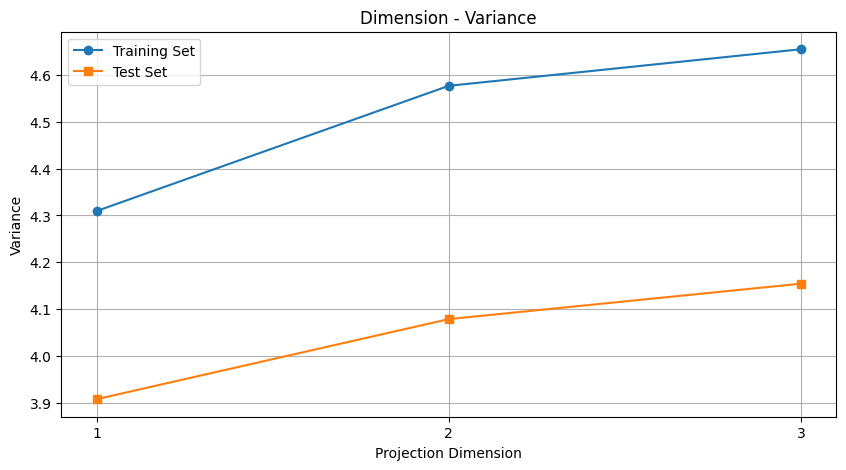

{figure}
The variance increases as the projection dimension increases. This is expected since higher dimensions capture more variance from the data.

Dimension - Reconstruction loss:


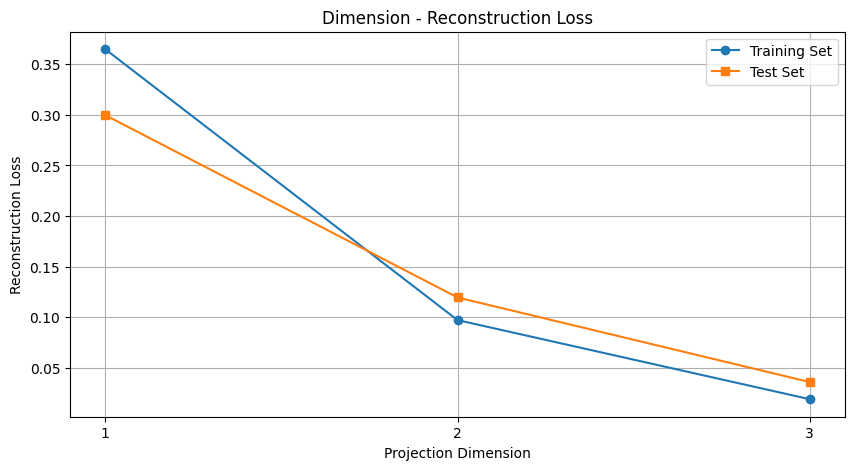

{figure}
The reconstruction loss decreases as the projection dimension increases. Higher dimensions allow for a more accurate reconstruction of the original data.


In [30]:
print("Q2.1.6 Plotting:")
print("\nDimension - Variance:")

# Dimensions to consider
dimensions = [1, 2, 3]

# Variances
variances_train = [variance_train, variance_train_2D, variance_train_3D]
variances_test = [variance_test, variance_test_2D, variance_test_3D]

# Reconstruction losses
reconstruction_losses_train = [reconstruction_loss_train, reconstruction_loss_train_2D, reconstruction_loss_train_3D]
reconstruction_losses_test = [reconstruction_loss_test, reconstruction_loss_test_2D, reconstruction_loss_test_3D]

# Plotting Variance
plt.figure(figsize=(10, 5))
plt.plot(dimensions, variances_train, marker='o', label='Training Set')
plt.plot(dimensions, variances_test, marker='s', label='Test Set')
plt.title('Dimension - Variance')
plt.xlabel('Projection Dimension')
plt.ylabel('Variance')
plt.xticks(dimensions)
plt.legend()
plt.grid(True)
plt.show()

# Description of relationship

print("{figure}")
print("The variance increases as the projection dimension increases. This is expected since higher dimensions capture more variance from the data.")
print("\nDimension - Reconstruction loss:")
# Plotting Reconstruction Loss
plt.figure(figsize=(10, 5))
plt.plot(dimensions, reconstruction_losses_train, marker='o', label='Training Set')
plt.plot(dimensions, reconstruction_losses_test, marker='s', label='Test Set')
plt.title('Dimension - Reconstruction Loss')
plt.xlabel('Projection Dimension')
plt.ylabel('Reconstruction Loss')
plt.xticks(dimensions)
plt.legend()
plt.grid(True)
plt.show()

# Description of relationship

print("{figure}")
print("The reconstruction loss decreases as the projection dimension increases. Higher dimensions allow for a more accurate reconstruction of the original data.")